# Computational Methods I, Winter 2024&#x2F;25

Lecturer: Dr. Falk Hassler, falk.hassler@uwr.edu.pl\
Labs: M.Sc. Biplab Mahato, biplab.mahato@uwr.edu.pl

  
## 5. Ordinary differntial equations
---
To be discussed on 2024-10-25 10:15:00 in the tutorial.

Differential equations are fundamental to our understanding of physics and many natural phenomena. In this homework, you'll develop your own differential equation solver. To avoid writing the same code again and again we will make the solver general enough to handle many types of differential equations. 

In [234]:
import numpy as np
import matplotlib.pyplot as plt

### Question 1: Radioactive decay
_(Points: 1.5)_

Radioactive decay is a classic example of a first-order differential equation. The rate of decay is proportional to the amount of material present:
$$
\frac{dN}{dt} = -\lambda N
$$
where $\lambda$ is the decay constant. 
Here is a code which implements the Euler method of solving this equation.

In [235]:
def solve_radioactive_decay(decay_constant, initial_concentration, dt, steps):
    data = np.zeros(steps)
    data[0] = initial_concentration

    for i in range(1, steps):
        data[i] = data[i - 1]  - decay_constant * data[i - 1] * dt 

    return data

**Q1.1)** Use the above function and plot the solution. Choose some values for initial concentration and decay constant.

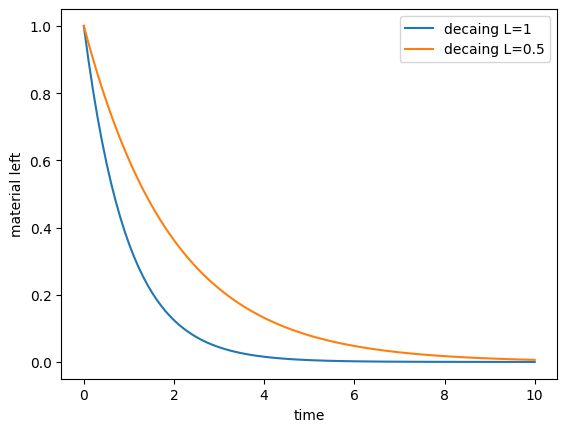

In [236]:
decay_constant, initial_concentration, dt, steps = 1, 1, 0.1, 100
time = np.linspace(0, np.ceil(dt*steps), steps)
data = solve_radioactive_decay(decay_constant, initial_concentration, dt, steps)
plt.plot(time, data, label="decaing L=1")
decay_constant_2 = 0.5
data_2 = solve_radioactive_decay(decay_constant_2, initial_concentration, dt, steps)
plt.plot(time, data_2, label="decaing L=0.5")
plt.xlabel("time")
plt.ylabel("material left")
plt.legend()
plt.show()

While the above implementation works, it's limited to radioactive decay. Here's a more general Euler method 

In [237]:
def euler_method(func, initial, t_start, t_finish, steps=100, params=[]):
    dt = (t_finish - t_start) / steps
    data = []
    data.append(initial)
    for i in range(0, steps-1):
        # WRONG ! no "data[-1]" multiplication next to func -> added
        # WRONG ! bad time was starting from t_y+1 not t_y -> changed range of for loop
        data.append(data[-1] + dt * func(data[-1], t_start + i*dt, params)) # data[-1] is last element of the data
    return np.array(data)

This function is general enough to solve even system of ordinary differential equations. Note that the input function have to be of the form `func(x, t, param)`. And it should return a number or a numpy array (for a system of odes). For example,

# **WARNING!**
## radioactive_decay() **function is probably wrong in the orginal file!** (look at comments)

In [238]:
def radioactive_decay(x, t, params):
    [decay_constant] = params # add [] around decay to extract the data in return
    return -decay_constant*x  # if params is a list then it is not working and need to multiply by x[!]

**Q1.2)** Check this method works \
**Ans:** This method works the same as less general solution

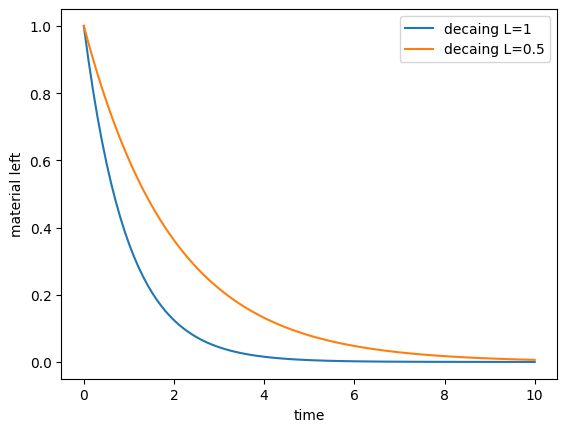

In [239]:
initial, t_start, t_finish, steps, params = 1, 0, 10, 100, [1]
time = np.linspace(t_start, t_finish, steps)

data = euler_method(radioactive_decay, initial, t_start, t_finish, steps, params)
plt.plot(time, data, label="decaing L=1")
params_2 = [0.5]
data_2 = euler_method(radioactive_decay, initial, t_start, t_finish, steps, params_2)
plt.plot(time, data_2, label="decaing L=0.5")
plt.xlabel("time")
plt.ylabel("material left")
plt.legend()
plt.show()

**Q1.3)** Write your own ode solver implementing a different algorithm(other than Euler, e.g. Runge-Kutta) to solve odes.

In [240]:
# Runge-Kutta Method 2-nd orded
def runge_kutta_method_2(func, initial, t_start, t_finish, steps=100, params=[]):
    dt = (t_finish - t_start) / steps
    data = []
    data.append(initial)
    for i in range(0, steps-1):
        k1 = dt*func(data[-1], t_start + i*dt, params)
        k2 = dt*func(data[-1]+k1, t_start + i*dt + dt, params)
        data.append(data[-1] + (k1+k2)/2) # data[-1] is last element of the data
    return np.array(data)

# Runge-Kutta Method 4-th orded
def runge_kutta_method(func, initial, t_start, t_finish, steps=100, params=[]):
    dt = (t_finish - t_start) / steps
    data = []
    data.append(initial)
    for i in range(0, steps-1):
        k1 = dt * func(data[-1], t_start + i*dt, params)
        k2 = dt * func(data[-1] + k1/2, t_start + i*dt + dt/2, params)
        k3 = dt * func(data[-1] + k2/2, t_start + i*dt + dt/2, params)
        k4 = dt * func(data[-1] + k3, t_start + i*dt + dt, params)

        data.append(data[-1] + (k1 + 2*k2 + 2*k3 + k4) / 6)
    return np.array(data)

# The Predictor-Corrector Method simple
def pc_method_simple(func, initial, t_start, t_finish, steps=100, params=[], k=1):
    dt = (t_finish - t_start) / steps
    data = []
    data.append(initial)
    for i in range(0, steps-1):
        data.append(data[-1] + dt * func(data[-1], t_start + i*dt, params)) # prediction
        for _ in range(1,k):
            data[-1] = (data[-2] + dt/2 *(func(data[-1], t_start + (i+1)*dt, params) + func(data[-2], t_start + i*dt, params))) # correction
    return np.array(data)

# The Predictor-Corrector Method
def pc_method(func, initial, t_start, t_finish, steps=100, params=[], k=1):
    dt = (t_finish - t_start) / steps
    data = []
    data.append(initial)
    # feed four initial values from Runge Kutta
    for i in range(0,3):
        k1 = dt * func(data[-1], t_start + i*dt, params)
        k2 = dt * func(data[-1] + k1/2, t_start + i*dt + dt/2, params)
        k3 = dt * func(data[-1] + k2/2, t_start + i*dt + dt/2, params)
        k4 = dt * func(data[-1] + k3, t_start + i*dt + dt, params)

        data.append(data[-1] + (k1 + 2*k2 + 2*k3 + k4) / 6)

    for i in range(3, steps-1):
        P = data[-1] + dt/24*(55*func(data[-1], t_start + i*dt, params) - 59*func(data[-2], t_start + (i-1)*dt, params) + 37*func(data[-3], t_start + (i-2)*dt, params) - 9*func(data[-4], t_start + (i-3)*dt, params))
        data.append(P) # prediction by four-step Adams-Bashforth method
        for _ in range(1, k):
            # correction by four-step Adams-Moulton method; k-times
            data[-1] = data[-2] + dt/24*(9*func(data[-1], t_start + (i+1)*dt, params) + 19*func(data[-2], t_start + i*dt, params) - 5*func(data[-3], t_start + (i-1)*dt, params) + func(data[-4], t_start + (i-2)*dt, params))
    return np.array(data)

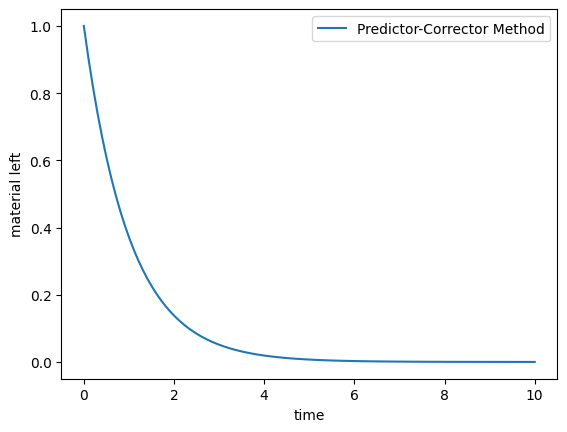

In [241]:
initial, t_start, t_finish, steps, params = 1, 0, 10, 100, [1]
time = np.linspace(t_start, t_finish, steps)

data = pc_method(radioactive_decay, initial, t_start, t_finish, steps, params)
plt.plot(time, data, label="Predictor-Corrector Method")
plt.xlabel("time")
plt.ylabel("material left")
plt.legend()
plt.show()

**Q1.4)** Plot the solution of radioactive decay in euler method and your method to compare. Use log scale. Plot also the analytical solution, $N = N_0 e^{-\lambda t}$, where $N_0$ is the initial concentration and $\lambda$ is the radioactive decay constant.

In [242]:
def exact_help(initial, decay_constant, time):
    return initial * np.exp(-time*decay_constant)

def exact(func, initial, t_start, t_finish, steps=100, params=[]):
    time = np.linspace(t_start, t_finish, steps)
    [decay_constant] = params
    data = (lambda x : func(initial, decay_constant, x))(time)
    return np.array(data)

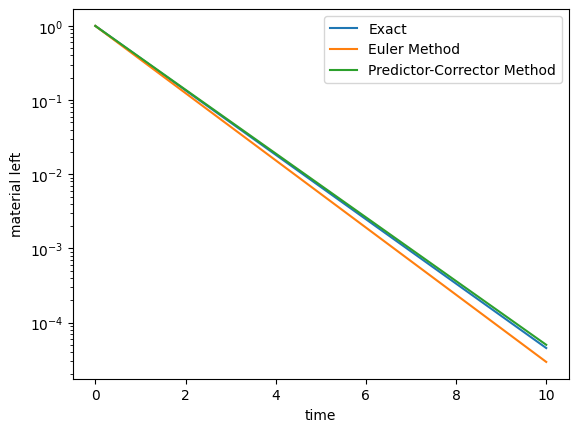

In [243]:
initial, t_start, t_finish, steps, params = 1, 0, 10, 100, [1]
time = np.linspace(t_start, t_finish, steps)

data = exact(exact_help, initial, t_start, t_finish, steps, params)
plt.plot(time, data, label="Exact")

data_2 = euler_method(radioactive_decay, initial, t_start, t_finish, steps, params)
plt.plot(time, data_2, label="Euler Method")

data_3 = pc_method(radioactive_decay, initial, t_start, t_finish, steps, params)
plt.plot(time, data_3, label="Predictor-Corrector Method")

plt.xlabel("time")
plt.ylabel("material left")
plt.legend()
plt.yscale("log")
plt.show()

### Question 2: System of ODEs
_(Points: 1.5)_

The code above can also be used to solve system of odes.
A famous system of ODEs is the Lorentz system, derived by Edward Lorentz in 1963 to describe atmospheric convection.
$$
\frac{dx}{dt} = \sigma(y- x)\\
\frac{dy}{dt} = x(\rho - z) - y \\
\frac{dz}{dt} = xy - \beta z
$$

**Q2.1)** Write code to solve the Lorentz system. Find a suitable set of parameters (e.g. $\sigma = 10.0, \rho = 21.0 ,\beta = 8/3$). 

**Q2.2)** Plot the solution in 3d.

In [244]:
# Define the Lorenz equations
# Hint: state is [x, y, z] and the function below should return np.array([dx/dt, dy/dt, dz/dt])
def lorenz(state, t, params):
    [sigma, rho, beta] = params
    [x, y, z] = state
    return np.array([sigma*(y-z), x*(rho-z)-y, x*y-beta*z])

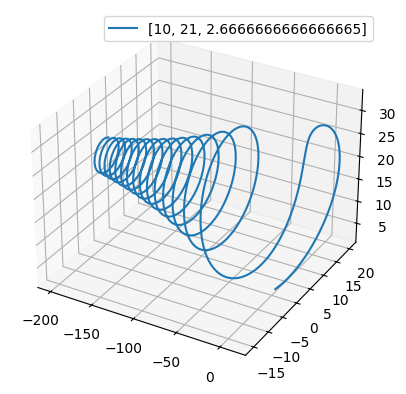

In [245]:
initial = [1,1,1.5] 
t_start = 0
t_finish = 1.5
steps = 1000
params = [10, 21, 8/3]
data = pc_method(lorenz, initial, t_start, t_finish, steps, params)
ax = plt.figure().add_subplot(projection='3d')
ax.plot(*data.T, label=str(params))
plt.legend()
plt.show()

params 0 = [1.8648805893260314, 20.651655446923712, 4.232211930828446]
params 1 = [7.177440445472106, 17.199666959459037, 6.557198865769804]
params 2 = [19.589573651054934, 7.892520232928945, 2.0496996092493394]
params 3 = [4.403599531539767, 2.775922488606916, 13.40964705930266]
params 4 = [14.284815334990196, 16.840106806532972, 7.576979244438787]
params 5 = [19.166766742241936, 4.647748803810453, 6.400497940021967]
params 6 = [17.045392217000753, 18.847278752679014, 1.809773703356369]
params 7 = [17.24547226165378, 5.330865078206942, 2.8537291830036895]
params 8 = [10.040450201864395, 16.429819758982717, 17.642215622383848]
params 9 = [8.592700603345845, 1.7701063173654554, 12.757489572556917]


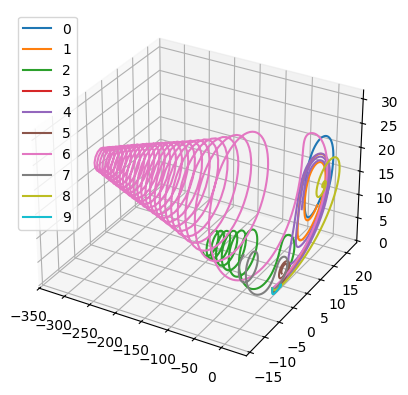

In [246]:
import random

initial = [1,1,1.5] 
t_start = 0
t_finish = 1.5
steps = 1000
ax = plt.figure().add_subplot(projection='3d')
for i in range(0,10):
    params[0] = random.uniform(1,21)
    params[1] = random.uniform(1,21)
    params[2] = random.uniform(1,21)
    print("params", i, "=", params)
    data = pc_method(lorenz, initial, t_start, t_finish, steps, params)
    ax.plot(*data.T, label=i)
plt.legend()
plt.show()

### Suitable parameters:
$$\\
[15.837916640332292, 17.165227272573873, 6.219960312062087] \\
[9.144210385522062, 16.082570864641838, 5.522978961757662] \\
[8.808813864166876, 18.074041263313575, 2.309505111300373] \\
[11.496342957546545, 10.374697099047598, 1.367407298751079] \\
[15.412392751158489, 8.378907595968975, 4.658705433660268] \\
[20.66915487045245, 11.189683732815432, 5.623590692753723] \\
[19.29608122219134, 11.015724764223371, 2.394453478351272] \\
$$

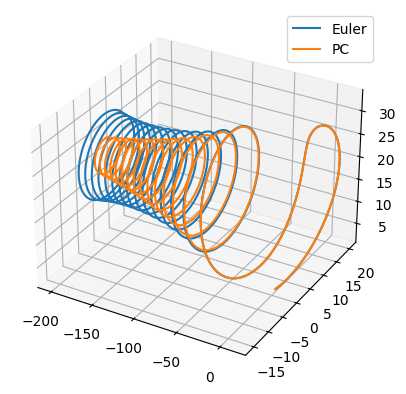

In [247]:
initial = [1,1,1.5] 
t_start = 0
t_finish = 1.5
steps = 10000
params = [10, 21, 8/3]
data = euler_method(lorenz, initial, t_start, t_finish, steps, params)
data_2 = pc_method(lorenz, initial, t_start, t_finish, steps, params)
ax = plt.figure().add_subplot(projection='3d')
ax.plot(*data.T, label="Euler")
ax.plot(*data_2.T, label="PC")
plt.legend()
plt.show()

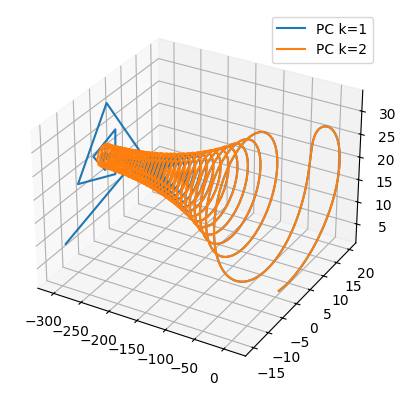

In [248]:
initial = [1,1,1.5] 
t_start = 0
t_finish = 2
steps = 1000
params = [10, 21, 8/3]
data = pc_method(lorenz, initial, t_start, t_finish, steps, params, 1)
data_2 = pc_method(lorenz, initial, t_start, t_finish, steps, params, 2)
ax = plt.figure().add_subplot(projection='3d')
ax.plot(*data.T, label="PC k=1")
ax.plot(*data_2.T, label="PC k=2")
plt.legend()
plt.show()

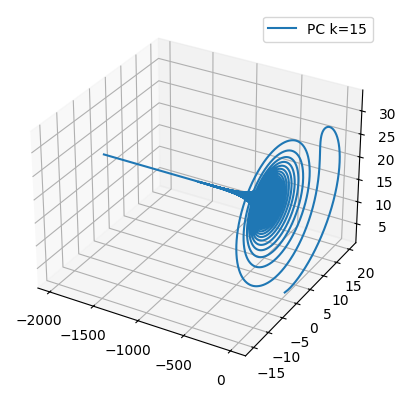

In [249]:
initial = [1,1,1.5] 
t_start = 0
t_finish = 10
steps = 30000
params = [10, 21, 8/3]
data = pc_method(lorenz, initial, t_start, t_finish, steps, params, 15)
ax = plt.figure().add_subplot(projection='3d')
ax.plot(*data.T, label="PC k=15")
plt.legend()
plt.show()

**Bonus Question:** Keep $\sigma = 10$ and $\beta=8/3$ and take different values of $\rho$, above and below $\rho_c = 24.74$. Solve and plot for these values. Do you find anything interesting? What happend when you change the initial state for values above and below $\rho_c$?

The model shows chaotic behaviour. We will explore chaos in classical systems in upcoming lectures/homeworks.

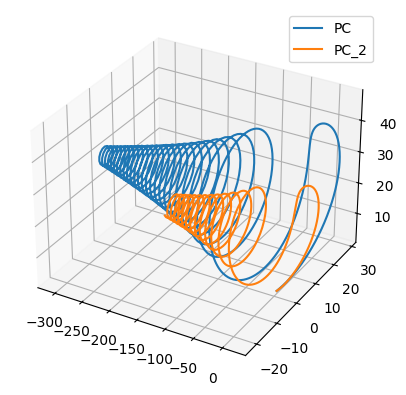

In [250]:
initial = [1,1,1.5] 
t_start = 0
t_finish = 1.5
steps = 1000

h = 5

params = [10, 24.74+h, 8/3]
data = pc_method(lorenz, initial, t_start, t_finish, steps, params)
ax = plt.figure().add_subplot(projection='3d')
ax.plot(*data.T, label="PC")

params = [10, 24.74-h, 8/3]
data_2 = pc_method(lorenz, initial, t_start, t_finish, steps, params)
ax.plot(*data_2.T, label="PC_2")

plt.legend()
plt.show()